In [3]:
import os

# Windows example
os.chdir(r"D:\Abhinav Tar Files\Snapshots")  


In [5]:
import os
os.listdir(".")

['MW_325.txt',
 'M31_000.txt',
 'M31_001.txt',
 'M31_002.txt',
 'M31_003.txt',
 'M31_004.txt',
 'M31_005.txt',
 'M31_006.txt',
 'M31_007.txt',
 'M31_008.txt',
 'M31_009.txt',
 'M31_010.txt',
 'M31_011.txt',
 'M31_012.txt',
 'M31_013.txt',
 'M31_014.txt',
 'M31_015.txt',
 'M31_016.txt',
 'M31_017.txt',
 'M31_018.txt',
 'M31_019.txt',
 'M31_020.txt',
 'M31_021.txt',
 'M31_022.txt',
 'M31_023.txt',
 'M31_024.txt',
 'M31_025.txt',
 'M31_026.txt',
 'M31_027.txt',
 'M31_028.txt',
 'M31_029.txt',
 'M31_030.txt',
 'M31_031.txt',
 'M31_032.txt',
 'M31_033.txt',
 'M31_034.txt',
 'M31_035.txt',
 'M31_036.txt',
 'M31_037.txt',
 'M31_038.txt',
 'M31_039.txt',
 'M31_040.txt',
 'M31_041.txt',
 'M31_042.txt',
 'M31_043.txt',
 'M31_044.txt',
 'M31_045.txt',
 'M31_046.txt',
 'M31_047.txt',
 'M31_048.txt',
 'M31_049.txt',
 'M31_050.txt',
 'M31_051.txt',
 'M31_052.txt',
 'M31_053.txt',
 'M31_054.txt',
 'M31_055.txt',
 'M31_056.txt',
 'M31_057.txt',
 'M31_058.txt',
 'M31_059.txt',
 'M31_060.txt',
 'M31_061

100 0.9894287392989118 0.9398451849151149
101 0.9894177867584291 0.9400753127785471
102 0.9894068373887649 0.9403052888408128
103 0.9893958911387281 0.9405353648949838
104 0.9893847749985232 0.9407653259020133
105 0.9893735795621281 0.9409950680780095
106 0.9893622890560216 0.9412243867646215
107 0.9893509265364335 0.9414539869264431
108 0.9893395165617868 0.9416837318807308
109 0.9893280443349185 0.9419136157458633
110 0.9893165369330451 0.9421433193519023
111 0.9893049778239209 0.942373459529727
112 0.9892933862555938 0.9426039214528767
113 0.9892817697645734 0.9428343122039635
114 0.9892701539120424 0.9430648664270522
115 0.9892585665270677 0.9432955218085685
116 0.9892469234096385 0.9435264235330492
117 0.9892352005296697 0.9437572872395846
118 0.9892234114799914 0.9439878825546896
119 0.9892115528631586 0.9442179991114099
120 0.9891996310522846 0.9444476256469687
121 0.9891876771646526 0.944677419032175
122 0.989175674612184 0.9449070785386129
123 0.9891636090603725 0.945136520309

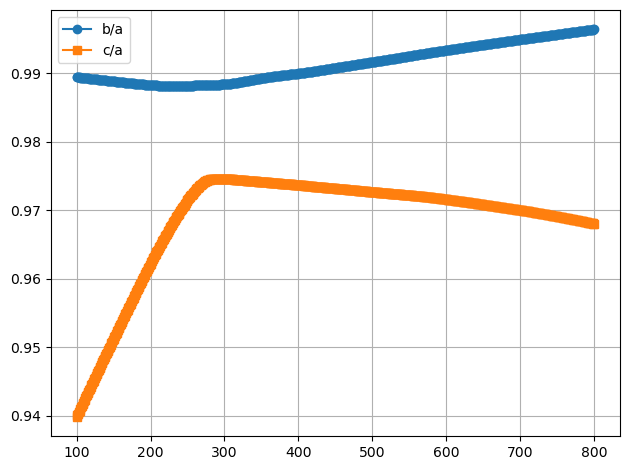

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from CenterOfMass2 import CenterOfMass

def compute_inertia_tensor(positions, masses):
    r2 = np.sum(positions**2, axis=1)
    I = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            d = 1.0 if i == j else 0.0
            I[i, j] = np.sum(masses * (r2 * d - positions[:, i] * positions[:, j]))
    return I

def compute_axis_ratios(I):
    eigvals, _ = np.linalg.eigh(I)
    eigvals = np.sort(eigvals)[::-1]
    return np.sqrt(eigvals[1] / eigvals[0]), np.sqrt(eigvals[2] / eigvals[0]), eigvals

def radial_shell_axis_ratios(positions, masses, r_bins):
    n = len(r_bins) - 1
    ba = np.full(n, np.nan)
    ca = np.full(n, np.nan)
    r = np.linalg.norm(positions, axis=1)
    for i in range(n):
        mask = (r >= r_bins[i]) & (r < r_bins[i+1])
        if np.sum(mask) >= 20:
            I = compute_inertia_tensor(positions[mask], masses[mask])
            b, c, _ = compute_axis_ratios(I)
            ba[i] = b
            ca[i] = c
    return ba, ca

snaps = np.arange(100, 801)
ba_series = np.zeros_like(snaps, dtype=float)
ca_series = np.zeros_like(snaps, dtype=float)

for i, s in enumerate(snaps):
    mw = f"MW_{s}.txt"
    m31 = f"M31_{s}.txt"
    MW = CenterOfMass(mw, 1)
    M31 = CenterOfMass(m31, 1)

    x = np.concatenate((MW.x, M31.x))
    y = np.concatenate((MW.y, M31.y))
    z = np.concatenate((MW.z, M31.z))
    m = np.concatenate((MW.m, M31.m))
    pos = np.vstack((x, y, z)).T

    xcom, ycom, zcom = MW.COMdefine(x, y, z, m)
    pos -= np.array([xcom, ycom, zcom])

    I = compute_inertia_tensor(pos, m)
    b, c, _ = compute_axis_ratios(I)

    ba_series[i] = b
    ca_series[i] = c

    print(s, b, c)

plt.figure()
plt.plot(snaps, ba_series, marker='o', label="b/a")
plt.plot(snaps, ca_series, marker='s', label="c/a")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("halo_shape_evolution.png", dpi=300)


Inertia Tensor:
 [[3.55327985e+08 5.46408277e+06 3.52852561e+06]
 [5.46408277e+06 3.44289892e+08 2.20582841e+05]
 [3.52852561e+06 2.20582841e+05 3.57701657e+08]]
b/a = 0.991, c/a = 0.973


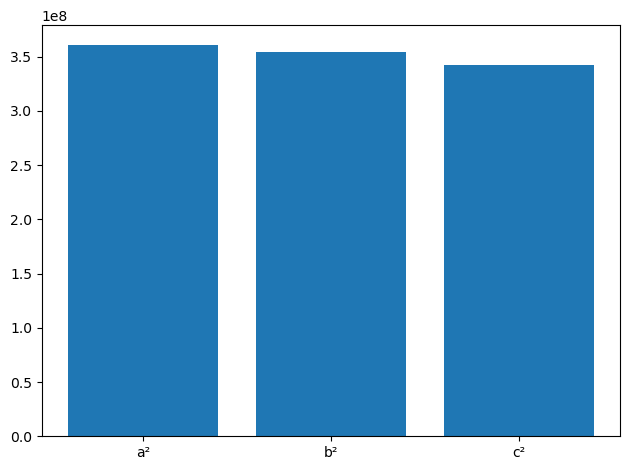

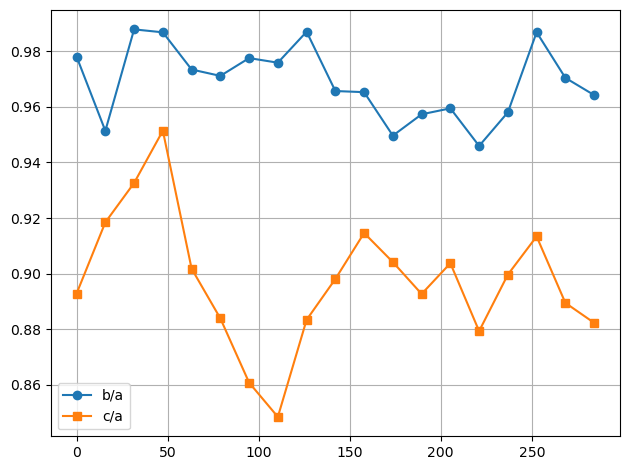

In [10]:
MW = CenterOfMass("MW_445.txt", 1)
M31 = CenterOfMass("M31_445.txt", 1)

x = np.concatenate((MW.x, M31.x))
y = np.concatenate((MW.y, M31.y))
z = np.concatenate((MW.z, M31.z))
m = np.concatenate((MW.m, M31.m))
positions = np.vstack((x, y, z)).T

xcom, ycom, zcom = MW.COMdefine(x, y, z, m)
positions -= np.array([xcom, ycom, zcom])

I = compute_inertia_tensor(positions, m)
b, c, eig = compute_axis_ratios(I)

print("Inertia Tensor:\n", I)
print(f"b/a = {b:.3f}, c/a = {c:.3f}")

plt.figure()
plt.bar(['a²','b²','c²'], eig)
plt.tight_layout()
plt.savefig("inertia_eigenvalues.png", dpi=300)

r_bins = np.linspace(0, 300, 20)
ba_prof, ca_prof = radial_shell_axis_ratios(positions, m, r_bins)

plt.figure()
plt.plot(r_bins[:-1], ba_prof, marker='o', label="b/a")
plt.plot(r_bins[:-1], ca_prof, marker='s', label="c/a")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("radial_axis_ratios.png", dpi=300)

